# Module 1: Introduction to Molecular Simulations

## Lesson 1: What is Molecular Dynamics?

### Motivation: Why Simulate Molecules?

At its heart, chemistry seeks to understand how the arrangement and interaction of atoms and molecules dictate the properties of matter we observe macroscopically (like temperature, pressure, phase behavior, reaction rates).

Molecular Dynamics (MD) simulation is a powerful computational technique that allows us to bridge this gap. It acts like a **"computational microscope,"** letting us observe the motions of individual atoms and molecules over time based on the forces between them.

By simulating these microscopic interactions, we can:
* Understand the link between molecular structure and bulk properties.
* Predict how materials will behave under different conditions.
* Study processes that are difficult or impossible to observe directly experimentally (e.g., very fast reactions, behavior at extreme conditions).
* Visualize complex molecular events like protein folding or drug binding.

### Overview of Simulation Types

While MD is our focus, it's good to know it's part of a broader family of molecular simulation techniques. Another common one is **Monte Carlo (MC)** simulation.

* **Molecular Dynamics (MD):** Calculates the deterministic trajectory of particles over time by solving Newton's equations of motion ($F=ma$). It naturally includes the concept of time and dynamics.
* **Monte Carlo (MC):** Uses random sampling to explore the possible configurations (arrangements) of particles in a system. It's excellent for calculating equilibrium thermodynamic properties but doesn't directly provide information about *how* the system evolves over time (dynamics).

We will focus exclusively on MD in this course.

### Key Components of an MD Simulation

A typical MD simulation involves several core ingredients:

1.  **Particles:** A defined set of atoms or molecules, each with a position, velocity, and mass.
2.  **Force Field:** A mathematical model describing the potential energy of the system as a function of particle positions. The negative gradient of this potential energy gives the forces acting on each particle ($F = -\nabla V$).
3.  **Integrator:** An algorithm (like the Verlet algorithm we'll learn) to numerically solve Newton's equations of motion, updating particle positions and velocities over small time steps.
4.  **Thermostat/Barostat (Optional but common):** Algorithms to control the system's temperature and/or pressure, mimicking experimental conditions (e.g., constant temperature - NVT ensemble).
5.  **Boundary Conditions:** Often Periodic Boundary Conditions (PBC) are used to simulate a small part of a larger, bulk system and avoid edge effects.

### Applications of MD

MD simulations are used across a vast range of scientific disciplines:

* **Drug Discovery:** Simulating how potential drug molecules bind to target proteins.
* **Materials Science:** Understanding properties of polymers, metals, ceramics, and designing new materials.
* **Biophysics:** Studying protein folding, enzyme mechanisms, DNA dynamics, lipid membrane behavior.
* **Chemistry:** Investigating reaction mechanisms, solvation processes, phase transitions.

## Lesson 2: Prerequisites Check & Python Refresher

### General Chemistry Concepts Review

This course assumes familiarity with basic general chemistry concepts, including:
* **Atoms and Molecules:** Basic structure, elements, chemical formulas.
* **Chemical Bonds:** Covalent, ionic bonds.
* **Intermolecular Forces (IMFs):** van der Waals forces (London dispersion, dipole-dipole), hydrogen bonding. Understanding that these forces dictate interactions between non-bonded molecules.
* **Energy:** Kinetic energy ($KE = \frac{1}{2}mv^2$), potential energy (stored energy due to position or configuration), conservation of energy.
* **Basic Thermodynamics:** Concepts of temperature, pressure, heat.

### Python, NumPy, and Matplotlib Refresher

We will use Python for our coding exercises, relying heavily on the `NumPy` library for numerical operations (especially with arrays) and `Matplotlib` for plotting.

If you are new to Python or need a refresher, here are some basic examples. You can execute the code cells below by selecting them and pressing `Shift + Enter`.

**1. Basic Variables and Arithmetic**

In [ ]:
# Assigning variables
a = 5
b = 3.14
message = "Hello, MD!"

# Printing variables
print(a)
print(b)
print(message)

# Basic arithmetic
sum_val = a + b
product_val = a * 2
print("Sum:", sum_val)
print("Product:", product_val)

5
3.14
Hello, MD!
Sum: 8.14
Product: 10


**2. Lists** (Ordered, mutable sequences)

In [ ]:
my_list = [1, 2, 3, "apple", 5.0]
print("Original list:", my_list)

# Accessing elements (index starts at 0)
print("First element:", my_list[0])
print("Last element:", my_list[-1])

# Adding elements
my_list.append("banana")
print("List after append:", my_list)

# Length of list
print("Length:", len(my_list))

Original list: [1, 2, 3, 'apple', 5.0]
First element: 1
Last element: 5.0
List after append: [1, 2, 3, 'apple', 5.0, 'banana']
Length: 6


**3. NumPy Arrays** (Essential for numerical calculations)

NumPy provides powerful array objects that are much more efficient for mathematical operations than standard Python lists. We'll use them extensively for positions, velocities, forces, etc.

In [ ]:
import numpy as np # Standard way to import numpy

# Create a NumPy array from a list
vec1 = np.array([1.0, 2.0, 3.0])
vec2 = np.array([0.5, 0.5, 0.5])
print("Vector 1:", vec1)
print("Vector 2:", vec2)

# Element-wise operations (unlike lists!)
sum_vec = vec1 + vec2
prod_vec = vec1 * 2.0
print("Sum of vectors:", sum_vec)
print("Vector 1 * 2:", prod_vec)

# Dot product
dot_prod = np.dot(vec1, vec2)
print("Dot product:", dot_prod)

# Creating arrays of zeros or ones
zeros_array = np.zeros(5) # Array of 5 zeros
ones_array = np.ones((2, 3)) # 2x3 array of ones
print("Zeros:", zeros_array)
print("Ones:", ones_array)

# Mathematical functions
print("Sine of vec1:", np.sin(vec1))

Vector 1: [1. 2. 3.]
Vector 2: [0.5 0.5 0.5]
Sum of vectors: [1.5 2.5 3.5]
Vector 1 * 2: [2. 4. 6.]
Dot product: 3.0
Zeros: [0. 0. 0. 0. 0.]
Ones: [[1. 1. 1.]
 [1. 1. 1.]]
Sine of vec1: [0.84147098 0.90929743 0.14112001]


**4. Functions** (Reusable blocks of code)

In [ ]:
# Define a simple function
def greet(name):
  """This function greets the person passed in as a parameter."""
  print(f"Hello, {name}!") # f-strings are useful for formatting

# Call the function
greet("Student")
greet("World")

# Function with return value
def calculate_kinetic_energy(mass, velocity):
  """Calculates kinetic energy given mass and velocity."""
  return 0.5 * mass * velocity**2

ke = calculate_kinetic_energy(mass=2.0, velocity=10.0)
print(f"Kinetic Energy: {ke}")

Hello, Student!
Hello, World!
Kinetic Energy: 100.0


**5. Basic Plotting with Matplotlib** (For visualizing results)

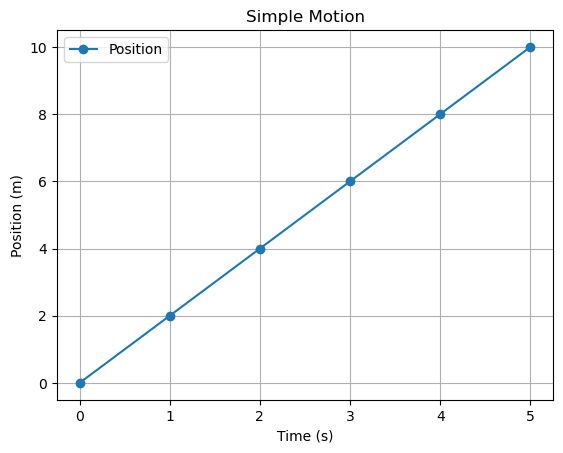

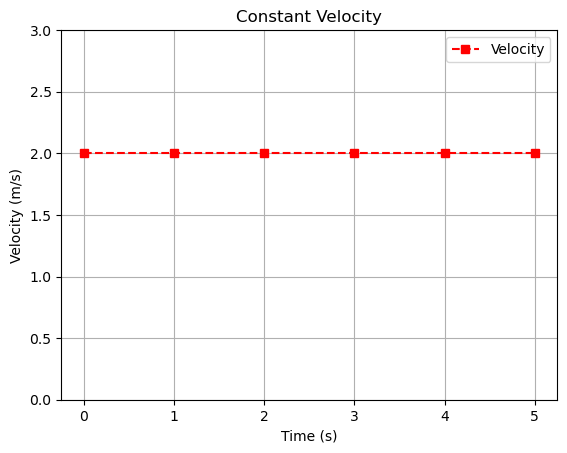

In [ ]:
import matplotlib.pyplot as plt # Standard way to import pyplot

# Sample data
time = np.array([0, 1, 2, 3, 4, 5])
position = np.array([0, 2, 4, 6, 8, 10])
velocity = np.array([2, 2, 2, 2, 2, 2])

# Create a figure and axes for plotting
fig, ax = plt.subplots()

# Plot position vs time
ax.plot(time, position, marker='o', linestyle='-', label='Position')

# Add labels and title
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
ax.set_title("Simple Motion")
ax.legend() # Show the legend
ax.grid(True) # Add a grid

# Display the plot
plt.show()

# --- Another plot on a separate figure ---
fig2, ax2 = plt.subplots()
ax2.plot(time, velocity, marker='s', linestyle='--', color='red', label='Velocity')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)")
ax2.set_title("Constant Velocity")
ax2.legend()
ax2.grid(True)
plt.ylim(0, 3) # Set y-axis limits
plt.show()

---
End of Module 1. In the next module, we will delve into the physics principles that form the foundation of MD simulations.